# MIE 1624 Assignment 3 
Design a course curriculum for a new “Master of Business and Management in Data Science and Artificial Intelligence” program at University of Toronto.
### Ziruo Song 1005637198

### Import Dependencies 

In [1]:
import pandas as pd
import random
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from yellowbrick.cluster import KElbowVisualizer
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean

# 1. Data Collection and cleaning

General steps for Web Scraping
1. Check whether the website allows web scraping
2. Obtain the source code (HTML File) by using the website URL
3. Download the website content
4. Parse the content using keywords tags for elements of interest
5. Extract relevant data/features
6. Organize raw data in structured format (e.g., CSV)
   
## 1. a) Adapt provided web-scraping code on Indeed
### 1 a) Step1: Path to webdriver (Chrome) 

#### 1 a) Step 2 Define positions and locations 
* position ==> data scientist, data analyst
* location ==> Canada, US

    - Note the websites of Indeed for US and Canada are different. Define two functions to get the urls seperately.



In [2]:
# Build two different urls functions for Canada and US

In [3]:
# Set positions and locations
# Get urls of the eligible jobs

### 1 a) Step 3: Scrape job postings, CA

In [4]:
# Apply function to scrape job postings for data scientist, in Canada
# Scrape job postings for data analyst, in Canada

### 1 a) Step 3: Continued. Scrape full job descriptions, CA

In [5]:
# Apply function to scrape job descriptions for data scientist or data analyst, in Canada

### 1 a) Step 4: Scrape job postings, and full job descriptions, US
Use pre-bulit functions above directly.

In [6]:
# Use the function built above to scrape job postings for data scientist and data analyst, in the US

In [7]:
# Use the function built above to get full descripitons for data scientist and data analyst, in the US

## 1.b) Clean & Save cleaned results to webscraping_results_assignmnet3.csv file. 
Combine the 4 dataframes above: 
* Canada & Data Scientist
* Canada & Data Analyst
* US & Data Scientist
* US & Data Analyst

Make sure the dataset will contain at least 1000 unique job postings to avoid underfitting in the further step.

#### Note:
* Although the postings in Indeed are more professional, instead of in a more casual way of tweets, we still have to perform basic text pre-proceesing on the scraped full descriptions to make them more eaisier to be read and used for the further exploration. 

### Some useful stragety for cleaning:
 - 1. Drop any duplicated postings, as we want to keep each posting to be unique, as some of them may be posted twice or more by mistake. 
 - 2. Check the data type is string for futher cleaning
 - 3. Remove puncuation 
 - 4. Substitude '\n' with an empty space(symbol for next line)
 - 5. Lower casting, although some skills should be in Capitals, like language 'R' or software 'Power BI',but we have to consider business skills that may appear in both lowercase or capital.
 - 6. Remove stopwords, like 'about','as','because',etc, which are less informative
 - 7. Tokenize, divide strings into lists of substrings
 - 8. Lemmatization: Considers the context and converts the word to its meaningful base form
 - 9. Drop any samples without full desciptions of the job, as the listed skills may not complete enough.

## As they are performed before I saved it to csv. file. Here I only kept the code but did not run them again.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
pd.options.mode.chained_assignment = None
wordnet_lemmatizer = WordNetLemmatizer()

# 1. Drop any duplicated postings.
result = result.drop_duplicates()
# 2. Add another column, do not modify on the original Full_Descriptions, make sure the dtype is string
result['full_desc_cleaned'] = result.loc[:,'Full_Descriptions'].apply(lambda x: str(x))
# 3. remove puctuations
result['full_desc_cleaned'] = result['full_desc_cleaned'].apply(lambda x: re.sub(r"[^\w\s]","", x))
# 4. remove \n, symbol of next line
result['full_desc_cleaned'] = result['full_desc_cleaned'].apply(lambda x: x.replace("\n", " "))
# 5. lower casting
result['full_desc_cleaned'] = result['full_desc_cleaned'].apply(lambda x: x.lower())
# 6. remove stopwords
stopwords = set(stopwords.words('english'))
result['full_desc_cleaned'] = result['full_desc_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# 7. Tokenization
result['tokenized'] = result['full_desc_cleaned'].apply(lambda x: nltk.word_tokenize(x))
# 8.Lemmatization
result['lemma'] = result['tokenized'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x]))
# 9.Drop any samples without full desciptions of the job
result = result[result['Full_Descriptions'].notnull()]

# Let's see the table after data pre-processing
result = result.drop(columns = ['full_desc_cleaned','tokenized'])

#### Save df into a csv. file 

In [8]:
#result.to_csv('webscraping_results_assignmnet3.csv',index=False)

## 1.c) Read webscraping_results_assignmnet3.csv file to your Jupyter notebook

In [9]:
indeed = pd.read_csv('webscraping_results_assignmnet3.csv')
indeed

,Title,Company,Location,Rating,Date,Salary,Description,Links,Full_Descriptions,lemma
0,Data Scientist,Charger Logistics Inc,"Brampton, ON",3.3,PostedPosted 6 days ago,NaN,Extract data using data mining techniques to u...,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Charger Logistics is a world class asset-based...,charger logistics world class assetbased carri...
1,Experimental Engineer or Applied Scientist to ...,Quantum Valley Ideas Lab,"Waterloo, ON",NaN,EmployerActive 2 days ago,NaN,The successful applicant will work under a pro...,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Quantum Valley Ideas Laboratories is a not-for...,quantum valley idea laboratory notforprofit ap...
2,Associate Data Scientist,Bank of Canada,"Hybrid remote in Ottawa, ON",4.1,PostedPosted 1 day ago,NaN,You will use big data technologies to leverage...,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Associate Data Scientist\n\nTake a central rol...,associate data scientist take central role ban...
3,Junior Data Scientist,M&M Food Market,"Mississauga, ON",3.8,PostedPosted 22 days ago,NaN,Create rich interactive visualizations through...,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,We are looking for our next Junior Data Scient...,looking next junior data scientist could junio...
4,Data Scientist,OMERS,"Toronto, ON",3.3,PostedPosted 3 days ago,NaN,"Experience in using external/alternative data,...",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Are you looking to join a dynamic pension plan...,looking join dynamic pension plan embodies str...
...,...,...,...,...,...,...,...,...,...,...
1422,Data Analyst,Texas A&M University,"Hybrid remote in College Station, TX",4.4,PostedPosted 24 days ago,NaN,"Prefer general experience in data management, ...",https://www.indeed.com/rc/clk?jk=2e80d51a9cc63...,Job Title\nData Analyst\nAgency\nTexas A&M Uni...,job title data analyst agency texas university...
1423,Junior Data Analyst,Stratacache Inc,"Dayton, OH 45423 (Downtown area)",3.8,PostedPosted 21 days ago,NaN,Analyze data to help provide new insights.\n1+...,https://www.indeed.com/rc/clk?jk=2b149ee3b9941...,STRATACACHE delivers in-store retail experienc...,stratacache delivers instore retail experience...
1424,IT – Business Analyst,Standard Iron,"Thomson, GA 30824",NaN,PostedPosted 9 days ago,NaN,3-5 years of proven experience in business ana...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"IT – Business Analyst\nHiring Bonus: $2,000\nJ...",business analyst hiring bonus 2000 job summary...
1425,Risk Analyst - Data Scientist,Funding Circle US,"Denver, CO 80202 (Lodo area)",3.5,PostedPosted 30+ days ago,"$90,000 - $120,000 a year",Utilizing the most innovative data sources and...,https://www.indeed.com/rc/clk?jk=282c6a9c8c5e0...,Who are we?\nWe want to help small businesses ...,want help small business win thats connect sma...


# 2. Exploratory data analysis and feature engineering
## 2.a) Extract data for technical/hard skills, business/soft skills, position title, company, and any other relevant information from job postings texts. 

###  Define tech/hard skills and business/soft skills

In [10]:
hard_skill_lst = [' excel ', 'python', ' r ', 'java', 'matlab', 'sas','sql', 'spss', 
                  'tableau', 'power bi','hadoop', 'spark','machine learning', 'deep learning']
soft_skill_lst =['communication', 'presentation','problem solving','project management', 
                 'teamwork','consulting', 'organization', 'leadership','risk management',
                 'critical thinking']

skills_lst = hard_skill_lst + soft_skill_lst

print('We will explore on {} hard skills and {} soft skills.'.format(len(hard_skill_lst),len(soft_skill_lst)))

We will explore on 14 hard skills and 10 soft skills.


In [11]:
pd.DataFrame([hard_skill_lst,soft_skill_lst],index=['Hard','Soft']).fillna(' ')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Hard,excel,python,r,java,matlab,sas,sql,spss,tableau,power bi,hadoop,spark,machine learning,deep learning
Soft,communication,presentation,problem solving,project management,teamwork,consulting,organization,leadership,risk management,critical thinking,,,,


### Extract skills

In [12]:
#Note, in the cell above, enter empty spaces around are excel and r, otherwise it would be misleading for the 
#algorithm to decide if the condition 'in' is met or not. For example, if a string contains'excellent', although we 
#want to know if excel(a skill) is contained in the srting, we would still get 'yes'.

temp = pd.DataFrame(columns = skills_lst, index = range(indeed.shape[0]))
for j in range(temp.shape[1]):
    for i in range(temp.shape[0]):
        temp.iloc[i,j] = 1 if skills_lst[j] in str(indeed.loc[i,'lemma']) else 0
        
#get rid of the empty space
#temp.rename(columns={' excel ':'Excel', ' r ':'R'},inplace =True)

In [13]:
temp = temp.astype(int)
df = pd.concat([indeed, temp], axis = 1)
df.tail()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Full_Descriptions,lemma,...,communication,presentation,problem solving,project management,teamwork,consulting,organization,leadership,risk management,critical thinking
1422,Data Analyst,Texas A&M University,"Hybrid remote in College Station, TX",4.4,PostedPosted 24 days ago,NaN,"Prefer general experience in data management, ...",https://www.indeed.com/rc/clk?jk=2e80d51a9cc63...,Job Title\nData Analyst\nAgency\nTexas A&M Uni...,job title data analyst agency texas university...,...,1,0,0,0,0,0,0,0,0,0
1423,Junior Data Analyst,Stratacache Inc,"Dayton, OH 45423 (Downtown area)",3.8,PostedPosted 21 days ago,NaN,Analyze data to help provide new insights.\n1+...,https://www.indeed.com/rc/clk?jk=2b149ee3b9941...,STRATACACHE delivers in-store retail experienc...,stratacache delivers instore retail experience...,...,1,0,0,0,0,0,0,0,0,0
1424,IT – Business Analyst,Standard Iron,"Thomson, GA 30824",NaN,PostedPosted 9 days ago,NaN,3-5 years of proven experience in business ana...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"IT – Business Analyst\nHiring Bonus: $2,000\nJ...",business analyst hiring bonus 2000 job summary...,...,0,0,0,0,0,0,1,0,0,0
1425,Risk Analyst - Data Scientist,Funding Circle US,"Denver, CO 80202 (Lodo area)",3.5,PostedPosted 30+ days ago,"$90,000 - $120,000 a year",Utilizing the most innovative data sources and...,https://www.indeed.com/rc/clk?jk=282c6a9c8c5e0...,Who are we?\nWe want to help small businesses ...,want help small business win thats connect sma...,...,1,0,0,0,0,0,0,0,0,0
1426,Data Science / Data Analyst - Early Career,LOCKHEED MARTIN CORPORATION,"Fort Worth, TX 76137 (Far North area)",4.0,PostedPosted 30+ days ago,NaN,"Techniques in data analysis, data extraction, ...",https://www.indeed.com/rc/clk?jk=699cc993187ff...,COVID-19 continues to significantly impact our...,covid19 continues significantly impact employe...,...,1,1,1,0,0,0,1,0,0,0


## 2.b) Organize data into logically formatted data structure for clustering analysis 
## 2.c) Engineer features for clustering analysis 
  * Some of the steps needed in this two parts have been performed above,
  * Just check what else are needed to do, to macth the format of the smaple table given.

* Here, compared with the smaple table given, the lemmatization is included in the final dataframe but not dropped, in case of any further need.

In [14]:
# check column names
#df.columns

# drop uncessary columns
df = df.drop(columns = ['Date','Links','Description','Full_Descriptions','Rating'])
df["lemma"] = df["lemma"].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               1427 non-null   object
 1   Company             1427 non-null   object
 2   Location            1427 non-null   object
 3   Salary              423 non-null    object
 4   lemma               1427 non-null   object
 5    excel              1427 non-null   int64 
 6   python              1427 non-null   int64 
 7    r                  1427 non-null   int64 
 8   java                1427 non-null   int64 
 9   matlab              1427 non-null   int64 
 10  sas                 1427 non-null   int64 
 11  sql                 1427 non-null   int64 
 12  spss                1427 non-null   int64 
 13  tableau             1427 non-null   int64 
 14  power bi            1427 non-null   int64 
 15  hadoop              1427 non-null   int64 
 16  spark               1427

* Note: There are too many missing values for Salary, so try not to rely on this feature for any
#prediction or classification, or just choose to drop it if needed.
#### Show the final dafaframe, which is the similar with the sample format, but with another column representing lemmatization of full description.

In [15]:
df.head() 

,Title,Company,Location,Salary,lemma,excel,python,r,java,matlab,...,communication,presentation,problem solving,project management,teamwork,consulting,organization,leadership,risk management,critical thinking
0,Data Scientist,Charger Logistics Inc,"Brampton, ON",NaN,charger logistics world class assetbased carri...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Experimental Engineer or Applied Scientist to ...,Quantum Valley Ideas Lab,"Waterloo, ON",NaN,quantum valley idea laboratory notforprofit ap...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Associate Data Scientist,Bank of Canada,"Hybrid remote in Ottawa, ON",NaN,associate data scientist take central role ban...,1,1,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,Junior Data Scientist,M&M Food Market,"Mississauga, ON",NaN,looking next junior data scientist could junio...,1,1,0,0,0,...,1,1,1,0,0,0,0,1,0,0
4,Data Scientist,OMERS,"Toronto, ON",NaN,looking join dynamic pension plan embodies str...,0,1,0,0,0,...,1,1,0,0,0,0,1,1,0,0


## 2.d) Visualize key information 

### 2 d) Visualization 1: Three Wordclouds of the  Full_Descriptions
* technical/hard skills
* business/soft skills
* all skills

#### Note: The wordclouds are based on the lemmatizations of the  cleaned Full_Descriptions, which avoid the counts of stopwords, and made the algorithm faster to be imputed.

After the first several trials, some less informative words are removed, like 'data','experience','work','skill','people','working','company', as they are manetioned quite frenquent but bring many noises for the comparisons.

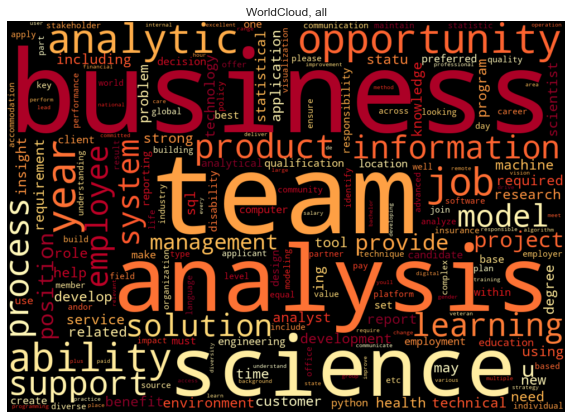

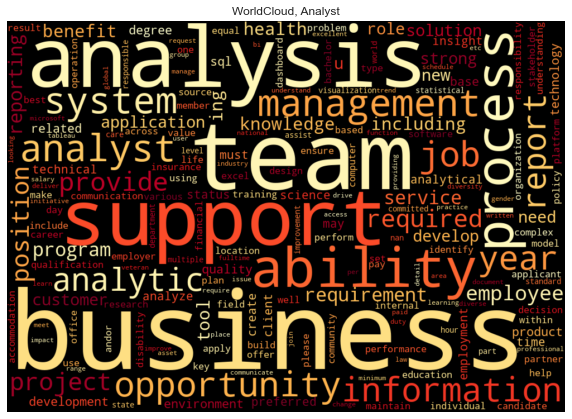

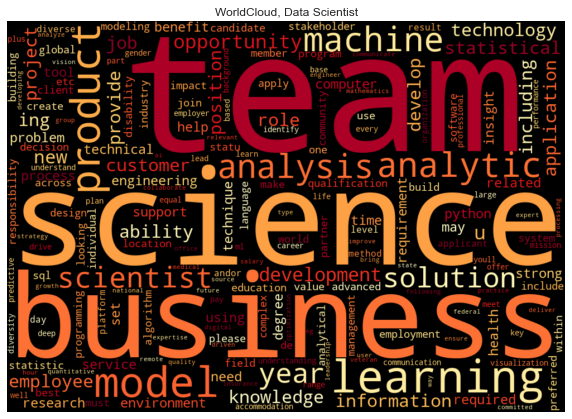

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# convert the title into lowercase.
df['Title'] = df['Title'].apply(lambda x: x.lower())

#select the part of dataframe, for Analyst or Data Scientist respectively
#analyst
ana_df = df[df.Title.str.contains('analyst')]
#data scientist
sci_df = df[df.Title.str.contains('data scientist')]   
#for i in ['data','experience','work','skill','people','working','company']:
ana_df = ana_df.replace('data', "")   
sci_df = sci_df.replace('data', "") 

ana_lemma_entire_str = ' '.join(ana_df["lemma"].ravel())
sci_lemma_entire_str = ' '.join(sci_df["lemma"].ravel())
for i in ['data','experience','work','skill','people','working','company']:
    ana_lemma_entire_str = ana_lemma_entire_str.replace(i, "")   
    sci_lemma_entire_str = sci_lemma_entire_str.replace(i, "") 

#creat three wordclouds for Analyst/Data Scientist/Both
wordcloud_ana = WordCloud(width = 1000, height = 700, collocations=False, random_state = 7,background_color="black",
                          colormap='YlOrRd').generate(ana_lemma_entire_str)
wordcloud_sci = WordCloud(width = 1000, height = 700, collocations=False, random_state = 7,background_color="black",
                          colormap='YlOrRd').generate(sci_lemma_entire_str)
wordcloud_all = WordCloud(width = 1000, height = 700, collocations=False, random_state = 7,background_color="black", 
                          colormap='YlOrRd').generate(sci_lemma_entire_str+ana_lemma_entire_str)

# Display the wordclouds
plt.figure(figsize = (10,8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title("WorldCloud, all")
plt.axis("off")
plt.show()

plt.figure(figsize = (10,8))
plt.imshow(wordcloud_ana, interpolation='bilinear')
plt.title("WorldCloud, Analyst")
plt.axis("off")
plt.show()

plt.figure(figsize = (10,8))
plt.imshow(wordcloud_sci, interpolation='bilinear')
plt.title("WorldCloud, Data Scientist")
plt.axis("off")
plt.show()

### Findings of WordClouds :
* Three word clouds of the  full job descriptions after lemmatization are performed, based on both or either of the two titles.

* Comparing the words clouds, excepts the less informative words which have been removed in this part, like ‘data’, ‘experience’, ‘work’, etc, we could see ‘business’, ‘team’ , ‘management’ , ‘analysis’,'model','product' were mentioned quite frequent, regardless of the job titles, data scientist or analyst. 

* Apart from common words for different job titles, for job postings about data scientist, ‘analysis’, ‘technology’, ‘python’, ‘machine’, ‘insight’, ‘process’, and ‘modelling’ are much frequent.

* On the contrary, ‘report’, ‘information’, ‘service’ , ‘sql’, ‘product’ can be caught more often in the descriptions of analyst. The visualization by word clouds can help us to grasp the frequency or importance of the words, but there are still much noise as shown.


### 2 d) Visualization 2:
* All skills vs. job titles
* All skills vs. both titles
* Technical/hard skills vs. job titles 
* Business/soft skills vs. job titles


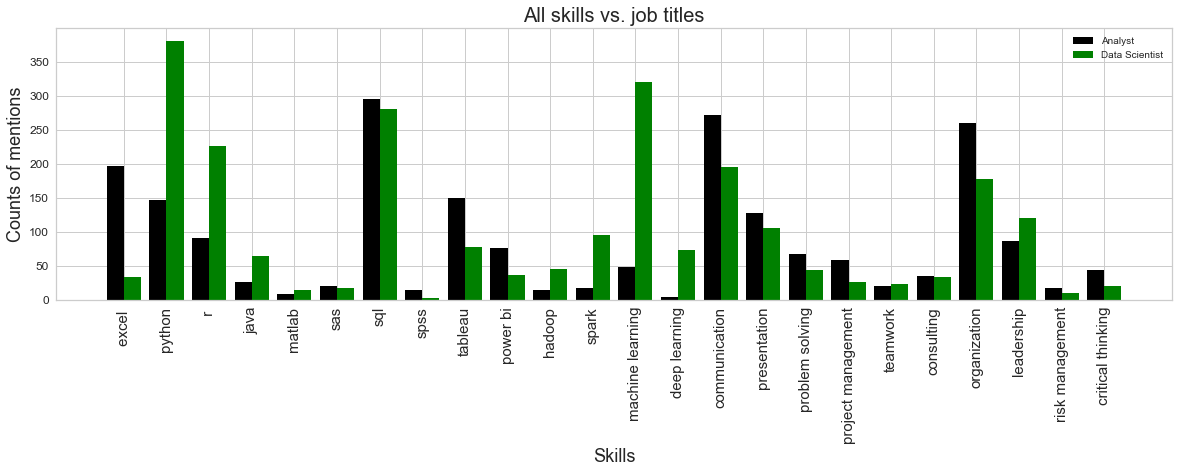

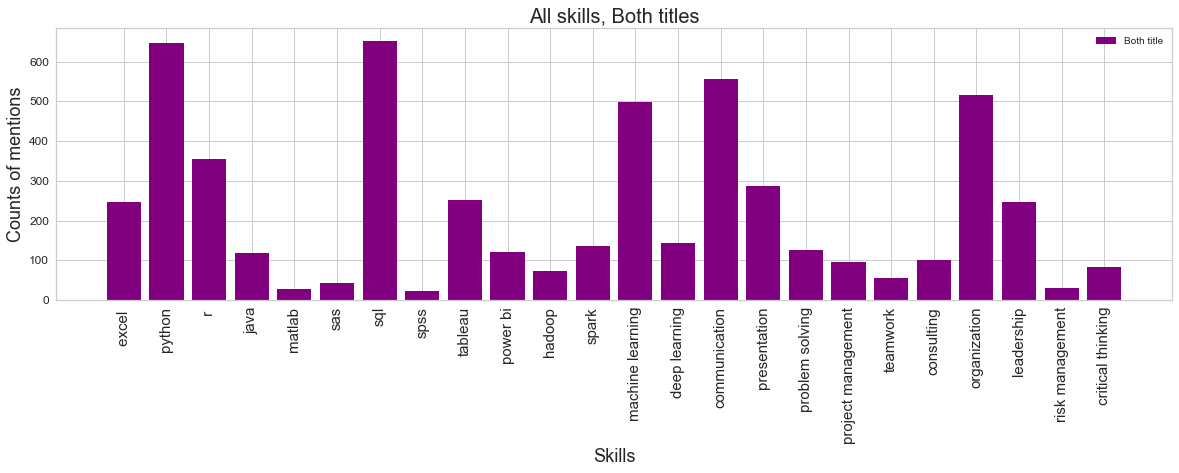

In [17]:
import numpy as np
X = skills_lst
# calulate counts of skills mentioned for each title and both title
y_ann = ana_df.iloc[:,5:].sum(axis=0).values
y_sci = sci_df.iloc[:,5:].sum(axis=0).values
y_all = df.iloc[:,5:].sum(axis=0).values

fig = plt.subplots(figsize=(20, 5)) 
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, y_ann, 0.4, label = 'Analyst', color = 'black')
plt.bar(X_axis + 0.2,y_sci, 0.4, label = 'Data Scientist', color = 'green')
plt.xticks(X_axis, X,rotation=90,fontsize=15)
plt.xlabel("Skills",fontsize = 18)
plt.ylabel("Counts of mentions",fontsize = 18)
plt.yticks(fontsize=12)
plt.title("All skills vs. job titles", fontsize = 20)
plt.legend(loc='upper right')
plt.show()

fig = plt.subplots(figsize=(20, 5)) 
plt.bar(X, y_all, label = 'Both title', color = 'purple')
plt.xticks(X,rotation=90,fontsize=15)
plt.xlabel("Skills",fontsize = 18)
plt.ylabel("Counts of mentions",fontsize = 18)
plt.yticks(fontsize=12)
plt.title("All skills, Both titles", fontsize = 20)
plt.legend(loc='upper right')
plt.show()

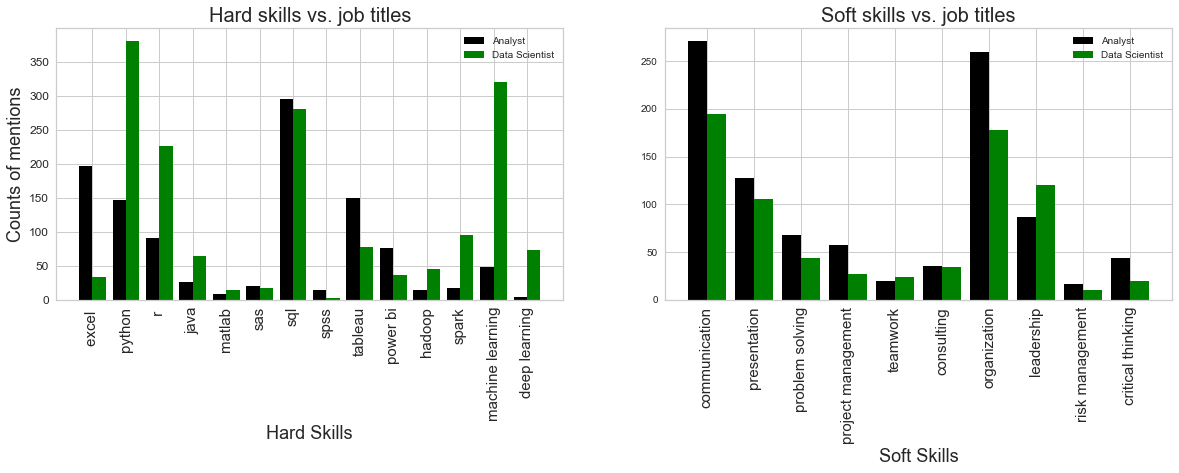

In [18]:
fig= plt.subplots(figsize=(20, 5)) 

plt.subplot(121)
X_hard = hard_skill_lst
y_ann_hard = ana_df.iloc[:,5:-10].sum(axis=0).values
y_sci_hard = sci_df.iloc[:,5:-10].sum(axis=0).values
#plot Hard skills vs. job titles
X_axis_hard = np.arange(len(X_hard))
plt.bar(X_axis_hard - 0.2, y_ann_hard, 0.4, label = 'Analyst', color = 'black')
plt.bar(X_axis_hard + 0.2,y_sci_hard, 0.4, label = 'Data Scientist', color = 'green')
plt.xticks(X_axis_hard, X_hard,rotation=90,fontsize=15)
plt.xlabel("Hard Skills",fontsize = 18)
plt.ylabel("Counts of mentions",fontsize = 18)
plt.yticks(fontsize=12)
plt.title("Hard skills vs. job titles", fontsize = 20)
plt.legend(loc='upper right')

plt.subplot(122)
X_soft = soft_skill_lst
y_ann_soft = ana_df.iloc[:,-10:].sum(axis=0).values
y_sci_soft = sci_df.iloc[:,-10:].sum(axis=0).values
#plot Hard skills vs. job titles
X_axis_soft = np.arange(len(X_soft))
plt.bar(X_axis_soft - 0.2, y_ann_soft, 0.4, label = 'Analyst', color = 'black')
plt.bar(X_axis_soft + 0.2,y_sci_soft, 0.4, label = 'Data Scientist', color = 'green')
plt.xticks(X_axis_soft, X_soft,rotation=90,fontsize=15)
plt.xlabel("Soft Skills",fontsize = 18)
plt.title("Soft skills vs. job titles", fontsize = 20)
plt.legend(loc='upper right')

### Findings from the bar plots :
1. Regardless of job titles, 'Python', 'SQL','machine learning','communication','organization' appeared much often.

2. For Data Scientist, 'Python','machine learning','SQL','R','communication','leadership','presentation' seems to be quite essential as the counts of these words mentioned are high. Then 'Spark','presentation','Tableau','Java','deep learning' are also seen as requiements for some companies.

3. For Analyst,'SQL','communication','organization','Excel','Tableau','presentation','Python' are some top skills required. And Excel are weighted more for Analyst than Data Scientist, whileas skills of using Python are more important for Data Scientist.

4. Both Analyst and Data Scientist may value SQL very much and in a similar level. Most of the hard skills we explored are required more often for Data Scientist, except the visualization tools, Tableau or Power BI, excel. And most of the soft skills are just slightly important for being an analytics.

5. Being equipted with hard skills on apply SAS, Matlab, SPSS may not be much necessary for both jobs here, as they are just mentioned occasionally.

# 3. Hierarchical clustering implementation
## 3. a)	Implement hierarchical clustering algorithm.

In [19]:
#keep the df with only skills
skills = df.iloc[:,5:]
#make sure they are numeric
skills =skills.apply(pd.to_numeric)

#### Ward: A method that tries to minimize the variance within each cluster.

In [20]:
a = skills.values
### Calculate element-wise differences
# empty matrix is fill
D = np.zeros([a.shape[1],a.shape[1]])

for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            D[i,j]+= euclidean(a[k,i],a[k,j])   #update each values by summing up the distance within3 each sample

# hierarchical clustering 
Y = sch.linkage(D, method="ward")

/var/folders/43/nrds9n3n523d8m2b4m6bh0480000gn/T/ipykernel_58324/1487254496.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method="ward")


## 3. b) Generate and plot a dendrogram from hierarchical clustering algorithm. 

Text(0.5, 0, 'Cluster Distance, Euclidean')

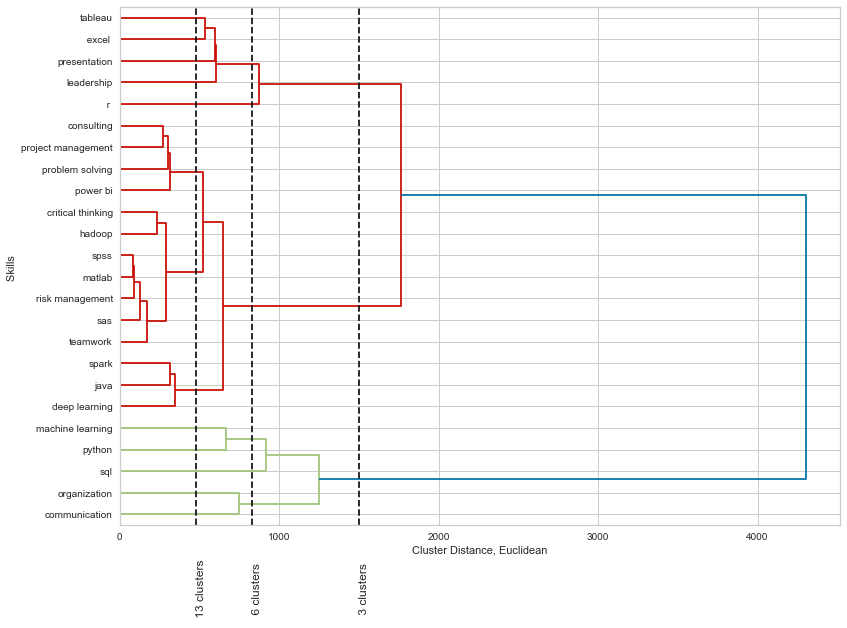

In [21]:
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right')
labels = skills.columns[Z1['leaves']]
ax1.set_yticklabels(labels)
plt.plot() #supress prints


#Firstly, try to seperate them using the normal way of drawing some vertical lines.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot([1500, 1500], bounds,'--', c='k')
ax.plot([830, 830], bounds,'--', c='k')
ax.plot([480, 480], bounds,'--', c='k')
ax.text(1500,-30,' 3 clusters', va='center', fontdict={'size': 12},rotation = 'vertical')
ax.text(830,-30,' 6 clusters', va='center', fontdict={'size': 12},rotation = 'vertical')
ax.text(480,-30,' 13 clusters', va='center', fontdict={'size': 12},rotation = 'vertical')


plt.ylabel("Skills ")
plt.xlabel("Cluster Distance, Euclidean")

## 3. c) Decide about a number of clusters that you would like to select keeping in mind that you need to design a sequence of 8-12 courses. Justify and explain your clusters in one paragraph. 

Generally, the optimal number of clusters based on the dendrogram can be found by:
* Firstly, find the line with the largest distance, which is the bottom blue one
* then, draw a vertically line to see how many 'branches' can pass through it, and the number is the optimum number of clutsers.

==> 3 Clusters here.

==> But here I would select 6 clusters as indicated above, based on both the common understandings of these topics, and the importance of each of them according to Part 2. 

Aloughth we want to design 8-12 course with 3-8 topic included in each course,and we only have 6 clutsers, we could select the several topics from  the same cluster and groups them into a course. As the skills used in each course are not limited to be unique, and the important ones (observed from the bar plots of Part 2) can be the focuses of several courses, which can enable the students to grasp the sufficient knowledge on the topic and learn how to apply the skills well. For example, MIE1624 and many other courses take Python as the major language. On the contrary, for the topics that appear not so frequent, like Matlab, SAS, SPSS, who are also grouped to a single large cluster,representing it is hard for the algorithm to seperate them, we could aggregate some of them into some introductory courses which probvide the student with the basic understanding of these topics. 

# 4. K-means or DBSCAN clustering implementation

## 4. a) k-means clustering algorithm.
### Switch the part (a) and (b) here Dertermine the number of cluster first by ElbowVisualizer first.

In [22]:
skills_T = skills.T
skills_T

,0,1,2,3,4,5,6,7,8,9,...,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426
excel,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
python,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
r,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
java,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
matlab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sql,0,0,0,1,0,1,1,1,1,0,...,1,0,0,0,0,1,1,1,1,1
spss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
tableau,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
power bi,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
# implement PCA first
pca = PCA(n_components = 2)
pca.fit(skills_T)
data_scores = pca.transform(skills_T)

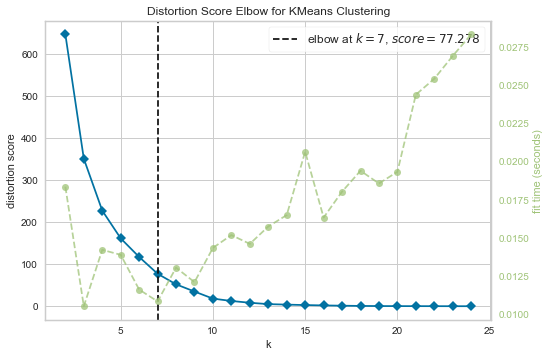

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
#implement K means
#Use elbow to find the optimal number of clusters
model = KMeans(random_state=1624)

# Try cluster from 2 to 25
visualizer = KElbowVisualizer(model, k=(2,25), timings= True)
visualizer.fit(data_scores)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

* Defualt metric hare is distortion. It computes the sum of squared distances from each point to its assigned center. 
* KElbowVisualizer displays the amount of time to train the clustering model per K as a dashed green line,and implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range from 2 to 25. If the line chart resembles an arm, it is a good sign that the underlying model fits best at that point, and the “elbow” will be annotated with a dashed line.
reference: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

## 4 b) Select k=7. Built the KMeans model.

In [25]:
Best_kmeanModel = KMeans(n_clusters=7,random_state=1624).fit(data_scores)

## 4. c) Visualize your clustering results, e.g., using a labeled scatterplot from k-means clustering algorithm

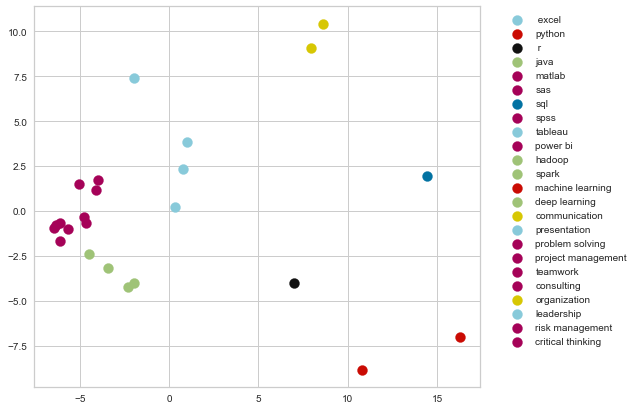

In [26]:
clusters = pd.DataFrame({'Cluster': Best_kmeanModel.labels_})
clusters['skills'] = skills_T.index

color = ['y','g','r','c','m','b','k','orange','brown','grey','lightsteelblue']
plt.figure(figsize=(8,7))
for i in range(skills_T.shape[0]):
    plt.scatter(data_scores[i,0], data_scores[i,1],label = clusters.skills[i],s=100,
                c=color[clusters.Cluster[i]])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# 5. Interpretation of results, discussion and final course curriculum

* Course curriculum are displayed in the report. Some considerations in design them:
    * Consider the most important skills derived from part 2 with priority
    * Take the pre-condition before learning some skills into account at the same time.

#### Prerequisites of these skills: 
* Spark: Prefer intermediate programming experience in Python or Scala.
* Power BI: Understand Excel, basic data analytics and business analytics concepts
* SPSS: Python, which makes it much easier to do complicated programming.

#### More details,including the curriculums are discussed in the report.
Choose the 2nd curriculum as the size of the big cluster in the Hierarchical clustring dropped and split to smaller sub-clusters here, which means the algorithm can learn those skill slightly better. Additionally, there are also less courses requiring pre-requisition which may provide more flexibility in course selection. However, genrally, the seperation is still not disirble, maybe consider more skills involved in this exporation.